<a href="https://colab.research.google.com/github/raghumriyer/colab/blob/master/Load_and_save_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


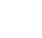

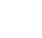

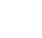

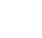

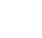

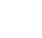

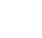

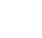

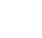

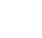

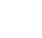

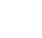

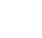

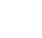

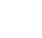

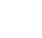

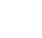

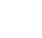

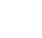

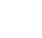

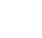

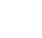

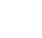

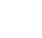

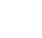

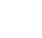

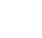

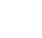

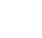

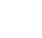

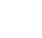

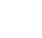

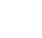

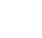

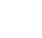

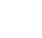

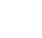

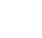

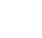

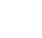

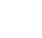

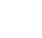

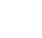

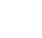

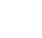

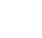

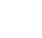

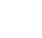

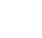

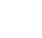

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random 
 
def unpickle(file):
	import pickle
	with open(file, 'rb') as fo:
		dict = pickle.load(fo, encoding='bytes')
	return dict

def get_data(file):
	absFile = os.path.abspath("/content/drive/My Drive/EIP3/cifar-10-batches-py/"+file)
	dict = unpickle(absFile)
	X = np.asarray(dict[b'data'].T).astype("uint8")
	Yraw = np.asarray(dict[b'labels'])
	Y = np.zeros((10,10000))
	for i in range(10000):
		Y[Yraw[i],i] = 1
	names = np.asarray(dict[b'filenames'])
	return X,Y,names

def visualize_image(X,Y,names,id):
  rgb = X[:,id]
  
  fig = plt.figure(figsize=(32,32),dpi=1)
  
  
  ax1 = fig.add_axes([0,0,1,1])
  ax1.set_axis_off()
  
  img = rgb.reshape(3,32,32).transpose([1, 2, 0])
  
  dir = os.path.abspath("drive/My Drive/EIP3/img3")
  plt.savefig(dir+"/"+names[id].decode('ascii'))

# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

for i in range(50):
  X,Y,names = get_data('data_batch_1')
  visualize_image(X,Y,names,random.randint(1,10000))